In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 

------------------------------

# Data slicing 

In [2]:
input_path = '/home/kevinteng/Desktop/linreg/'
input_ds = pd.read_csv(input_path + 'random.csv', names = ['x_1','x_2','x_3','y'])

In [3]:
n_cols = len(input_ds.columns)
print("Number of columns:", n_cols)

Number of columns: 4


In [4]:
print (input_ds.head())

    x_1   x_2       x_3         y
0 -3.40 -0.61  2.738000  7.496644
1 -3.11  3.85  0.366667  0.134444
2 -0.12 -2.72  0.442667  0.195954
3  0.08 -0.53 -0.779333  0.607360
4  0.20 -3.86  0.654667  0.428588


In [5]:
for headers in input_ds:
    print(headers)

x_1
x_2
x_3
y


In [6]:
x_1 = pd.DataFrame(input_ds.x_1)
x_2 = pd.DataFrame(input_ds.x_2)
x_3 = pd.DataFrame(input_ds.x_3)
y = pd.DataFrame(input_ds.y)
print("Total number of data points:", len(y))

Total number of data points: 1000


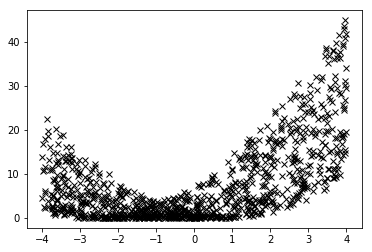

In [7]:
plt.plot(x_1, y, 'kx')

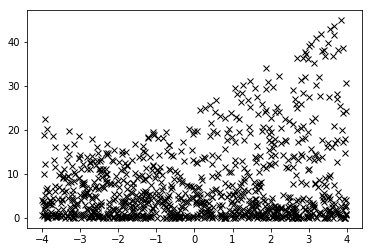

In [8]:
plt.plot(x_2, y, 'kx')

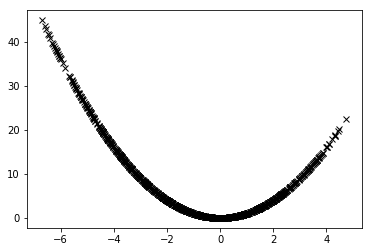

In [9]:
plt.plot(x_3, y, 'kx')

In [10]:
def vectorize(inps):
    inps = np.asarray(inps)
    return np.squeeze(inps)

In [11]:
def sq_loss(y_true, y_pred):
    '''
    Compute sum of squared loss
    @param y_true: array of target values/labels
    @param y_pred: array of predicted values
    
    return: sum of squared loss
    '''
    #squaring loss
    sq = (y_true - y_pred)**2 
    return np.sum(sq)

In [12]:
def grad(x, y, w):
    
    lin_func = w*x
    return np.sum(x*(y - lin_func))

# def compute_grad(x_1, x_2, y_true, w):
#     y_true = vectorize(y_true)
#     x_1 = vectorize(x_1)
#     x_2 = vectorize(x_2)
    
#     grad_1 = grad(x_1, y_true, w)
#     grad_2 = grad(x_1, y_true, w)
    
#     return grad_1 + grad_2

In [13]:
# threshold = 0.0001
# lr = 0.0001 
# w1 = 0
# w2 = 0
# iters = 0
# #list
# iters_list = []
# w1_list = []
# w2_list = []
# target_list = []
# loss_list = []
# error = 0


# #vectorize
# x_1 = vectorize(x_1)
# x_2 = vectorize(x_2)

# while error >= threshold:
#     w1 += lr*grad(x_1, y, w1)
#     w2 += lr*grad(x_2, y, w2)
#     y_pred = w1*x_1 + w2*x_2
#     loss = sq_loss(y, y_pred)
    
#     w1_list.append(w1)
#     w2_list.append(w2)
#     target_list.append(y_pred)
#     loss_list.append(loss)
    
#     if (iters == 0):
#         error = 0
#     else:
#         error = loss_list[iters] - loss_list[iters -1]
    
#     print("Iters: {}, w1: {}, w2:{}, loss:{}".format(iters, w1, w2, loss))
#     iters+=1 

In [15]:
threshold = 0.0001
lr = 0.0001 
w1 = 0
w2 = 0
iters = 0
#list
iters_list = []
w1_list = []
w2_list = []
target_list = []
loss_list = []
steps = 0

#vectorize
x_1 = vectorize(x_1)
x_2 = vectorize(x_2)
y_true = vectorize(y)
while steps <=90:
    if steps == 0:
        w1 = 0
        w2 = 0
    else:
        w1 += lr*grad(x_1, y_true, w1)
        w2 += lr*grad(x_2, y_true, w2)
        
    y_pred = w1*x_1 + w2*x_2
    loss = sq_loss(y_true, y_pred)
        
    w1_list.append(w1)
    w2_list.append(w2)
    target_list.append(y_pred)
    loss_list.append(loss)
    
    print("Iters: {}, w1: {}, w2:{}, loss:{}".format(steps, w1, w2, loss))
    
    steps+=1 

Iters: 0, w1: 0, w2:0, loss:131446.90264576484
Iters: 1, w1: 1.0781798753227594, w2:0.5225737666864967, loss:110506.6516311679
Iters: 2, w1: 1.5747574500451313, w2:0.7625182043730264, loss:106091.18462474117
Iters: 3, w1: 1.803466307779408, w2:0.872690847637847, loss:105165.43424178826
Iters: 4, w1: 1.9088028035632982, w2:0.9232776061432258, loss:104973.78930061669
Iters: 5, w1: 1.9573176597606083, w2:0.946504970580062, loss:104935.25401253611
Iters: 6, w1: 1.9796621592081176, w2:0.9571700235429679, loss:104928.04127055917
Iters: 7, w1: 1.9899533709047819, w2:0.9620669783830618, loss:104926.95089299211
Iters: 8, w1: 1.9946931968487174, w2:0.9643154591725454, loss:104926.92122675372
Iters: 9, w1: 1.9968762196686722, w2:0.9653478693183942, loss:104927.00754384507
Iters: 10, w1: 1.9978816550346146, w2:0.9658219097079038, loss:104927.06841869937
Iters: 11, w1: 1.9983447286524654, w2:0.9660395696096299, loss:104927.1009011882
Iters: 12, w1: 1.9985580065844075, w2:0.9661395101080933, loss:10